## Analysis of the dependence of the degree dynamics of the networks on the fitness distribution

#### Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt

import sys
sys.path.insert(0, '../')

from src import utils

#### Generating the networks and extracting degree dynamics

In [2]:
size = 10_000
iterations = 50

##### Delta fitness distribution

In [11]:
fitness_data_delta = [1 for _ in range(size)]

times, node_degrees = utils.simulate(size, iterations, fitness_data_delta)
mean_degrees_delta = utils.get_means(node_degrees)

##### Uniform fitness distribution

In [5]:
times, node_degrees = [], []

rng = np.random.default_rng(1234)
fitness_data_uniform = rng.random(size)

times, node_degrees = utils.simulate(size, iterations, fitness_data_uniform)
mean_degrees_uniform = utils.get_means(node_degrees)

#### Visualizing the degree dynamics

/var/folders/38/6f3j8mrj32z9zt7bvm61ytqm0000gn/T/ipykernel_2128/1245893752.py:32: RuntimeWarning: divide by zero encountered in log
  for x in times[0]: lnt.append(np.log(x))
/var/folders/38/6f3j8mrj32z9zt7bvm61ytqm0000gn/T/ipykernel_2128/1245893752.py:72: RuntimeWarning: divide by zero encountered in log
  for x in times[0]: lnt.append(np.log(x))


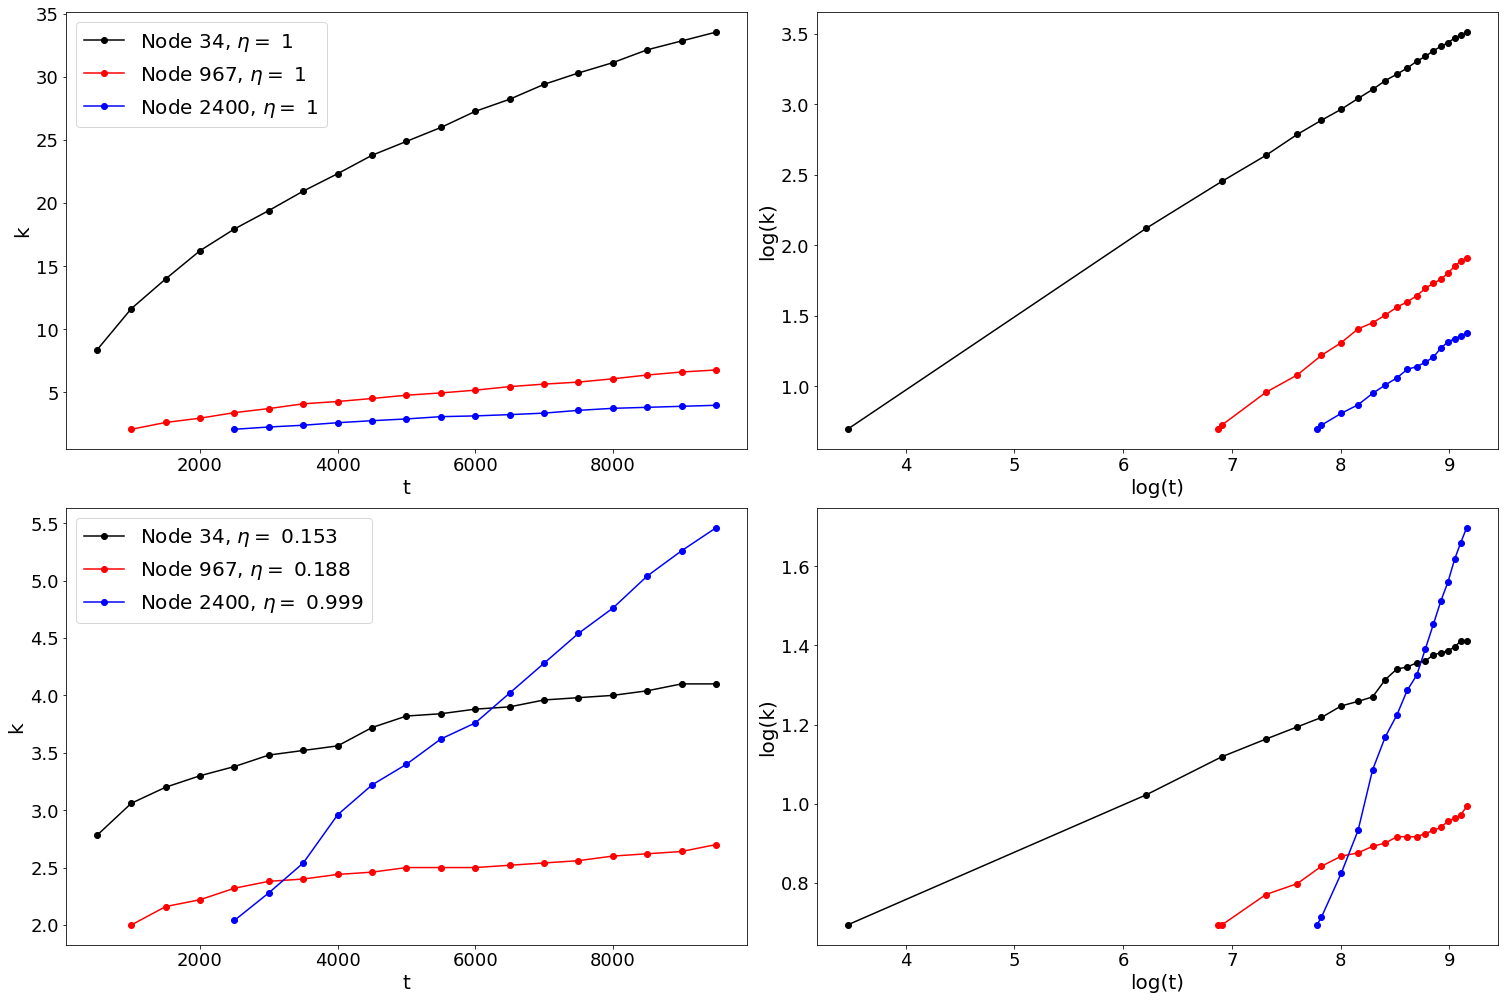

In [19]:
picked_nodes = [34, 967, 2400]
resolution = 500
colors = ['black', 'red', 'blue']

fig, axs = plt.subplots(2, 2, figsize=(21, 14))

for ax in axs.flatten():
    ax.tick_params(axis = 'both', labelsize = 18)

# Delta fitness distribution

# linear scale
for j, node in enumerate(picked_nodes):
    times_temp = []
    degrees_temp = []
    for i in range(len(mean_degrees_delta[node])):
        if times[0][node][i] % resolution == 0:
            times_temp.append(times[0][node][i])
            degrees_temp.append(mean_degrees_delta[node][i])         

    axs[0][0].plot(times_temp, degrees_temp, marker='o', color = colors[j], label=f'Node {node}')

legend_labels = [f'Node {node}, $\eta = $ {np.round(fitness_data_delta[node], 3)}' for node in picked_nodes]

axs[0][0].legend(legend_labels, fontsize = 20)
axs[0][0].set_xlabel('t', fontsize = 20)
axs[0][0].set_ylabel('k', fontsize = 20)

# loglog scale
lnt, lnk = [], []

for x in times[0]: lnt.append(np.log(x))
for x in mean_degrees_delta: lnk.append(np.log(x))
    
for j, node in enumerate(picked_nodes):
    times_temp = [lnt[node][0]]
    degrees_temp = [lnk[node][0]]
    for i in range(len(lnk[node])):
        if times[0][node][i] % resolution == 0:
            times_temp.append(lnt[node][i])
            degrees_temp.append(lnk[node][i])         

    axs[0][1].plot(times_temp, degrees_temp, marker='o', color = colors[j], label=f'Node {node}')

legend_labels = [f'Node {node}, $\eta = $ {np.round(fitness_data_delta[node], 3)}' for node in picked_nodes]

axs[0][1].set_xlabel('log(t)', fontsize = 20)
axs[0][1].set_ylabel('log(k)', fontsize = 20)

# Uniform fitness distribution

# linear scale
for j, node in enumerate(picked_nodes):
    times_temp = []
    degrees_temp = []
    for i in range(len(mean_degrees_uniform[node])):
        if times[0][node][i] % resolution == 0:
            times_temp.append(times[0][node][i])
            degrees_temp.append(mean_degrees_uniform[node][i])         

    axs[1][0].plot(times_temp, degrees_temp, marker='o', color = colors[j], label=f'Node {node}')

legend_labels = [f'Node {node}, $\eta = $ {np.round(fitness_data_uniform[node], 3)}' for node in picked_nodes]

axs[1][0].legend(legend_labels, fontsize = 20)
axs[1][0].set_xlabel('t', fontsize = 20)
axs[1][0].set_ylabel('k', fontsize = 20)

# loglog scale
lnt, lnk = [], []

for x in times[0]: lnt.append(np.log(x))
for x in mean_degrees_uniform: lnk.append(np.log(x))
    
for j, node in enumerate(picked_nodes):
    times_temp = [lnt[node][0]]
    degrees_temp = [lnk[node][0]]
    for i in range(len(lnk[node])):
        if times[0][node][i] % resolution == 0:
            times_temp.append(lnt[node][i])
            degrees_temp.append(lnk[node][i])         

    axs[1][1].plot(times_temp, degrees_temp, marker='o', color = colors[j], label=f'Node {node}')

legend_labels = [f'Node {node}, $\eta = $ {np.round(fitness_data_uniform[node], 3)}' for node in picked_nodes]

axs[1][1].set_xlabel('log(t)', fontsize = 20)
axs[1][1].set_ylabel('log(k)', fontsize = 20)

plt.tight_layout()
plt.savefig('../results/degree_dynamics.png', dpi=300)
plt.show()